In [1]:
# Matthew - Testing Data ML project

# imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [15]:
df = pd.read_csv(Path("wr_data.csv"))
df

,player,player_id,position,team_name,player_game_count,avg_depth_of_target,avoided_tackles,caught_percent,contested_catch_rate,contested_receptions,...,targeted_qb_rating,targets,touchdowns,wide_rate,wide_snaps,yards,yards_after_catch,yards_after_catch_per_reception,yards_per_reception,yprr
0,CeeDee Lamb,61570,WR,DAL,18,10.4,20,73.1,36.7,11,...,118.4,197,12,40.3,299,1859,709,4.9,12.9,2.69
1,Amon-Ra St. Brown,84470,WR,DET,19,8.0,21,74.2,51.7,15,...,115.9,190,11,43.6,316,1789,802,5.7,12.7,2.59
2,Stefon Diggs,9579,WR,BUF,19,10.6,21,66.9,41.9,13,...,93.4,175,8,63.1,444,1256,460,3.9,10.7,1.89
3,Tyreek Hill,10799,WR,MIA,17,11.3,28,70.9,30.4,7,...,120.2,175,14,60.5,315,1861,689,5.6,15.0,3.72
4,Davante Adams,8688,WR,LV,17,11.1,8,60.2,35.3,12,...,81.1,171,8,82.0,496,1144,337,3.3,11.1,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Brandin Echols,98900,CB,NYJ,1,9.0,0,100.0,NaN,0,...,118.8,1,0,0.0,0,18,9,9.0,18.0,18.00
482,Malcolm Rodriguez,60731,LB,DET,4,6.0,0,100.0,NaN,0,...,91.7,1,0,10.0,1,6,0,0.0,6.0,1.20
483,Cody Thompson,48152,WR,SEA,6,7.0,0,100.0,NaN,0,...,108.3,1,0,85.7,6,10,3,3.0,10.0,1.43
484,Sam Howell,97599,QB,WAS,17,1.0,0,100.0,NaN,0,...,83.3,1,0,0.0,0,4,3,3.0,4.0,4.00


In [7]:
df.isnull().sum()

player                               0
player_id                            0
position                             0
team_name                            0
player_game_count                    0
avg_depth_of_target                  0
avoided_tackles                      0
caught_percent                       0
contested_catch_rate               143
contested_receptions                 0
contested_targets                    0
declined_penalties                   0
drop_rate                           16
drops                                0
first_downs                          0
franchise_id                         0
fumbles                              0
grades_hands_drop                   20
grades_hands_fumble                 13
grades_offense                       0
grades_pass_block                  148
grades_pass_route                    1
inline_rate                          0
inline_snaps                         0
interceptions                        0
longest                  

In [9]:
df.dtypes

player                              object
player_id                            int64
position                            object
team_name                           object
player_game_count                    int64
avg_depth_of_target                float64
avoided_tackles                      int64
caught_percent                     float64
contested_catch_rate               float64
contested_receptions                 int64
contested_targets                    int64
declined_penalties                   int64
drop_rate                          float64
drops                                int64
first_downs                          int64
franchise_id                         int64
fumbles                              int64
grades_hands_drop                  float64
grades_hands_fumble                float64
grades_offense                     float64
grades_pass_block                  float64
grades_pass_route                  float64
inline_rate                        float64
inline_snap

In [46]:
# Cleaning Data
df_wr = df[df['position'] == "WR"]
df_wr = df_wr[df_wr["routes"] > 200]

df_wr = df_wr[["yards", "player", "player_id", "player_game_count", "avg_depth_of_target", "avoided_tackles", "caught_percent", "contested_catch_rate",               
"contested_receptions", "contested_targets", "drop_rate", "drops", "fumbles", "pass_plays", "receptions", "route_rate", "routes", "slot_rate",
"slot_snaps", "targeted_qb_rating", "targets", "touchdowns", "wide_rate", "wide_snaps", "yards_after_catch", "yards_after_catch_per_reception",
"yards_per_reception", "yprr"]]

In [47]:
df_wr

,yards,player,player_id,player_game_count,avg_depth_of_target,avoided_tackles,caught_percent,contested_catch_rate,contested_receptions,contested_targets,...,slot_snaps,targeted_qb_rating,targets,touchdowns,wide_rate,wide_snaps,yards_after_catch,yards_after_catch_per_reception,yards_per_reception,yprr
0,1859,CeeDee Lamb,61570,18,10.4,20,73.1,36.7,11,30,...,435,118.4,197,12,40.3,299,709,4.9,12.9,2.69
1,1789,Amon-Ra St. Brown,84470,19,8.0,21,74.2,51.7,15,29,...,401,115.9,190,11,43.6,316,802,5.7,12.7,2.59
2,1256,Stefon Diggs,9579,19,10.6,21,66.9,41.9,13,31,...,251,93.4,175,8,63.1,444,460,3.9,10.7,1.89
3,1861,Tyreek Hill,10799,17,11.3,28,70.9,30.4,7,23,...,195,120.2,175,14,60.5,315,689,5.6,15.0,3.72
4,1144,Davante Adams,8688,17,11.1,8,60.2,35.3,12,34,...,102,81.1,171,8,82.0,496,337,3.3,11.1,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,154,Quez Watkins,61664,9,10.4,1,72.0,57.1,4,7,...,146,67.8,25,1,38.9,93,66,3.7,8.6,0.68
228,155,Donovan Peoples-Jones,61439,17,11.5,2,54.2,100.0,1,1,...,90,39.4,24,0,68.5,196,34,2.6,11.9,0.59
258,162,Lil'Jordan Humphrey,42247,17,9.9,3,65.0,50.0,1,2,...,154,129.6,20,3,34.3,83,98,7.5,12.5,0.73
262,169,Olamide Zaccheaus,44920,18,12.5,0,57.9,40.0,2,5,...,233,122.5,19,2,32.9,115,54,4.9,15.4,0.50


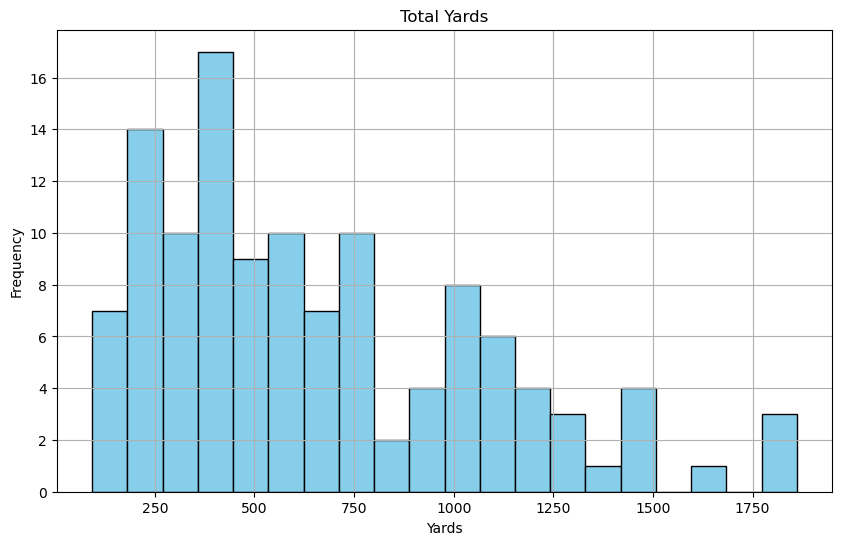

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(df_wr['yards'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Total Yards')
plt.xlabel('Yards')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='avg_depth_of_target', ylabel='yards'>

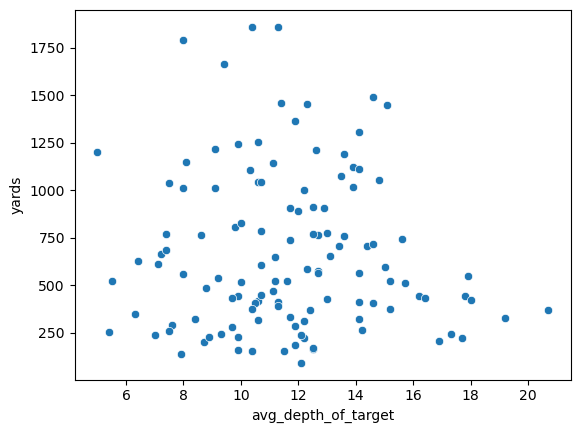

In [49]:
sns.scatterplot(data = df_wr, x = df_wr["avg_depth_of_target"], y = df_wr["yards"]) 

In [51]:
df_wr.corr()

,yards,player_id,player_game_count,avg_depth_of_target,avoided_tackles,caught_percent,contested_catch_rate,contested_receptions,contested_targets,drop_rate,...,slot_snaps,targeted_qb_rating,targets,touchdowns,wide_rate,wide_snaps,yards_after_catch,yards_after_catch_per_reception,yards_per_reception,yprr
yards,1.000000,-0.065774,0.328519,-0.067042,0.716227,0.391342,0.098563,0.713504,0.757748,-0.181872,...,0.288617,0.424779,0.946463,0.811361,0.142095,0.592676,0.882393,0.293298,0.268529,0.880586
player_id,-0.065774,1.000000,0.118280,0.062767,0.060330,-0.067661,-0.096172,-0.152076,-0.109480,0.149340,...,-0.043798,-0.088094,-0.089241,-0.117891,0.036128,0.005290,0.040253,0.129396,0.024580,-0.093301
player_game_count,0.328519,0.118280,1.000000,-0.066960,0.279729,0.137113,0.040127,0.216763,0.223080,0.040097,...,0.309146,0.148943,0.332477,0.285245,-0.051655,0.329625,0.321622,0.105948,0.010462,0.078652
avg_depth_of_target,-0.067042,0.062767,-0.066960,1.000000,-0.301000,-0.563483,0.117916,0.096172,0.093502,0.184720,...,-0.524333,-0.054218,-0.158208,0.037156,0.579671,0.338737,-0.367611,-0.453162,0.661958,-0.027997
avoided_tackles,0.716227,0.060330,0.279729,-0.301000,1.000000,0.384365,-0.050157,0.328729,0.423186,-0.180947,...,0.287581,0.333737,0.676110,0.562886,-0.042622,0.280439,0.833277,0.563538,0.070970,0.666464
caught_percent,0.391342,-0.067661,0.137113,-0.563483,0.384365,1.000000,0.156489,0.117058,0.008357,-0.377338,...,0.464324,0.605072,0.308283,0.314103,-0.426000,-0.183482,0.527298,0.410488,-0.101551,0.460312
contested_catch_rate,0.098563,-0.096172,0.040127,0.117916,-0.050157,0.156489,1.000000,0.412415,0.108774,-0.300444,...,-0.016475,0.159594,0.059854,0.131169,0.093652,0.105637,-0.026912,-0.314870,0.119779,0.054915
contested_receptions,0.713504,-0.152076,0.216763,0.096172,0.328729,0.117058,0.412415,1.000000,0.906431,-0.119629,...,0.029752,0.195289,0.732656,0.586394,0.363524,0.693002,0.483973,-0.111283,0.166176,0.525074
contested_targets,0.757748,-0.109480,0.223080,0.093502,0.423186,0.008357,0.108774,0.906431,1.000000,-0.047125,...,0.041641,0.115696,0.815045,0.610588,0.391514,0.761111,0.539447,-0.036551,0.143914,0.547197
drop_rate,-0.181872,0.149340,0.040097,0.184720,-0.180947,-0.377338,-0.300444,-0.119629,-0.047125,1.000000,...,-0.058087,-0.177931,-0.155285,-0.149973,0.028848,0.017317,-0.193608,-0.065510,0.049187,-0.243136


<AxesSubplot:xlabel='touchdowns', ylabel='yards'>

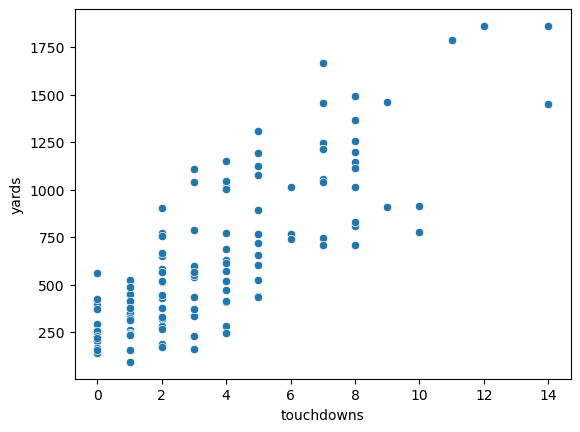

In [55]:
sns.scatterplot(data = df_wr, x = df_wr["touchdowns"], y = df_wr["yards"]) 

<AxesSubplot:xlabel='receptions', ylabel='yards'>

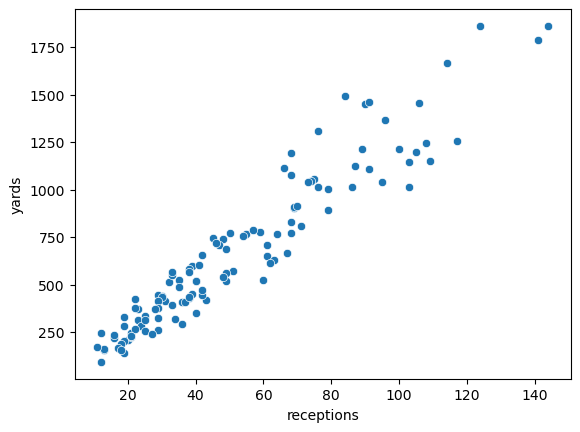

In [54]:
sns.scatterplot(data = df_wr, x = df_wr["receptions"], y = df_wr["yards"]) 

In [59]:
from sklearn.linear_model import LinearRegression

x = df_wr[["player_game_count", "avg_depth_of_target", "avoided_tackles", "caught_percent", "contested_catch_rate",               
"contested_receptions", "contested_targets", "drop_rate", "drops", "fumbles", "pass_plays", "receptions", "route_rate", "routes", "slot_rate",
"slot_snaps", "targeted_qb_rating", "targets", "touchdowns", "wide_rate", "wide_snaps", "yards_after_catch_per_reception",
"yards_per_reception", "yprr"]]
y = df_wr["yards"]

lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(-1165.8254390267334,
 array([ 4.63715217e+00,  6.11777403e-01,  7.22811833e-01, -2.55139229e+00,
         1.13870922e-01,  3.05428608e+00,  1.62652936e+00,  4.00764861e-01,
        -1.08186321e+00,  2.97975668e+00, -5.94727690e-01,  8.89789099e+00,
        -9.46502201e+00,  2.42240085e+00,  1.93099731e+01, -1.58679583e+00,
        -1.04463859e+00, -2.36727289e+00,  1.04903113e+01,  1.69607302e+01,
        -1.11843058e+00,  2.25125628e-01, -2.79717308e-01,  1.63363021e+01,
         2.18417206e+02]))